In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
df = pd.read_csv('../datasets/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.iloc[:, 2:-1].values
y = df.iloc[:, -1].values

x_scaler = StandardScaler()
X = x_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

classifier = SVC()
classifier.fit(X_train, y_train)
accuracy = classifier.score(X_test, y_test)
print(f'accuracy: {accuracy}')

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy: 0.95
[[55  3]
 [ 1 21]]


In [19]:
# Applying K-Fold Cross Validation
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10, n_jobs=-1)

print(f'accuracies: {accuracies}')
print(f'mean: {accuracies.mean()}')
print(f'standard deviation: {accuracies.std()}')

accuracies: [0.84375 0.875   0.90625 0.84375 0.9375  0.84375 0.90625 0.90625 1.
 0.9375 ]
mean: 0.9
standard deviation: 0.0480071609241788


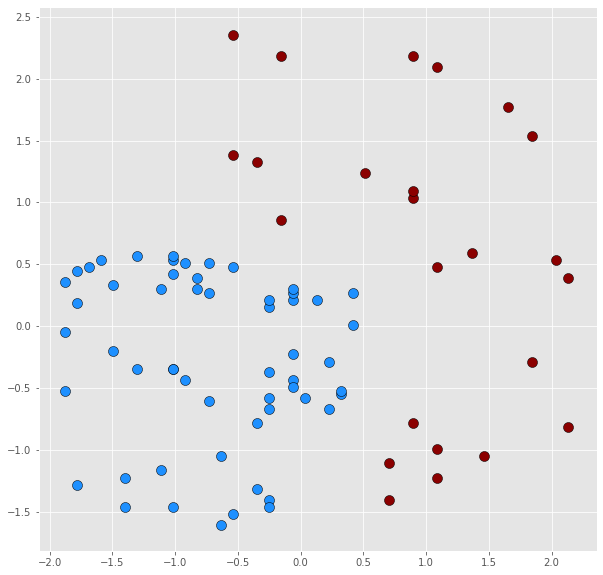

In [18]:
plt.figure(figsize=(10, 10))
plt.scatter([x[0] for i, x in enumerate(X_test) if y_pred[i] == 0], 
            [x[1] for i, x in enumerate(X_test) if y_pred[i] == 0], 
            color='dodgerblue', s=100, edgecolor='k')

plt.scatter([x[0] for i, x in enumerate(X_test) if y_pred[i] == 1], 
            [x[1] for i, x in enumerate(X_test) if y_pred[i] == 1], 
            color='darkred', s=100, edgecolor='k')
plt.show()